In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from geopy.geocoders import Nominatim
import geopandas as gpd
import plotly.express as px

In [4]:
political = pd.read_csv("1668215920_export.csv")
political

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375345,475690,542,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27 UTC,2016-01-09 02:09:57 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375346,475691,542,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06 UTC,2016-01-10 01:55:36 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375347,475692,542,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51 UTC,2016-01-10 01:24:21 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54
375348,475693,542,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23 UTC,2016-01-16 03:35:53 UTC,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54


In [5]:
political.shape

(375350, 19)

In [6]:
pres = political[political.race=="PRES"]
pres2016 = pres[pres.cycle==2016.0]
pres2016.candidates.value_counts()

Donald Trump                                                              56297
Hillary Clinton                                                           49568
Bernie Sanders                                                            31886
Donald Trump, Hillary Clinton                                             22005
Marco Rubio                                                               19894
                                                                          ...  
Donald Trump, Gary Johnson, Gary Johnson, Hillary Clinton, Jill Stein         1
Carly Fiorina, Donald Trump, Hillary Clinton, Ted Cruz                        1
Donald Trump, Hillary Clinton, Jeb Bush, Marco Rubio, Ted Cruz, Carson        1
Hillary Clinton, John Kasich, Ted Cruz                                        1
Ben Carson, Donald Trump, Jeb Bush, Marco Rubio, Ted Cruz                     1
Name: candidates, Length: 74, dtype: int64

In [7]:
pres2016_plot = pres2016.copy()
pres2016_plot["start_time"]= pd.to_datetime(pres2016_plot["start_time"])
pres2016_plot["end_time"]= pd.to_datetime(pres2016_plot["end_time"])
pres2016_plot["ad_time"]=pres2016_plot["end_time"]-pres2016_plot["start_time"]
pres2016_plot

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_time
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375345,475690,542,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30
375346,475691,542,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30
375347,475692,542,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30
375348,475693,542,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,Rand Paul for President,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30


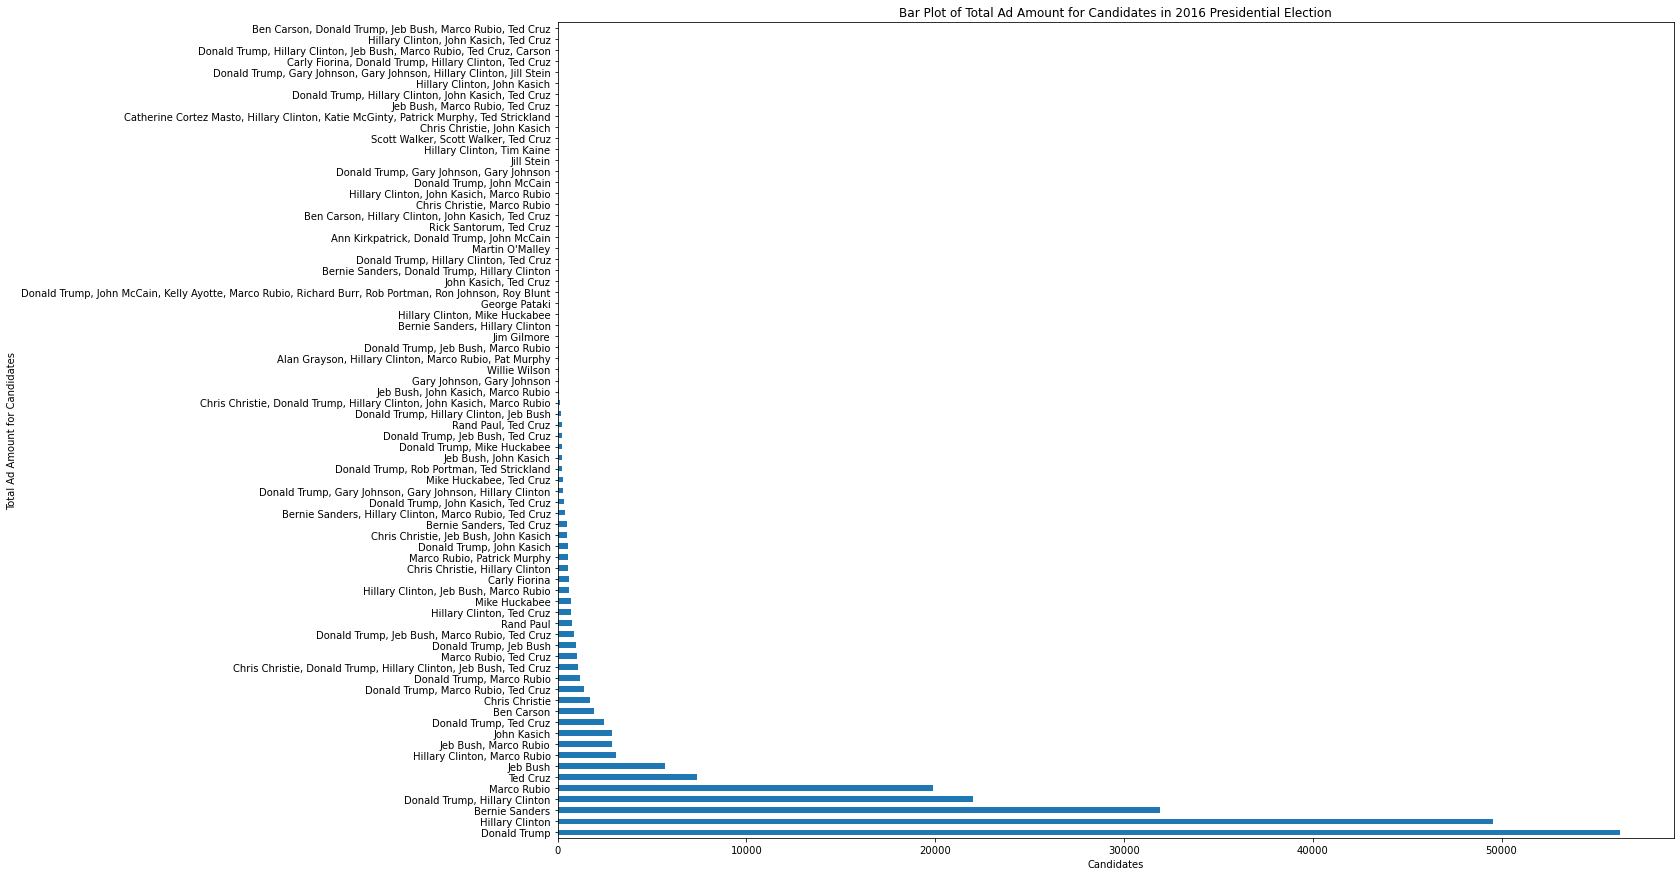

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))
pres2016_plot.candidates.value_counts()[:74].plot(kind="barh")
plt.xlabel("Candidates")
plt.ylabel("Total Ad Amount for Candidates")
plt.title("Bar Plot of Total Ad Amount for Candidates in 2016 Presidential Election");

In [9]:
geolocator = Nominatim(user_agent="MyApp")
#pres2016_plot["location_coordinates"] = geolocator.geocode()
#get a list of cities
lasvegas = pres2016_plot.location[0]
lasvegas
lasvegas[:lasvegas.index(",")]
lasvegas_location = geolocator.geocode(lasvegas)
lasvegas_location

Location(Las Vegas, Clark County, Nevada, United States, (36.1672559, -115.148516, 0.0))

In [10]:
pres2016_plot=pres2016_plot[pres2016_plot.location.isna()==False] #filter out null values
location_cities = []
for location in pres2016_plot.location:
    city = location[:location.index(",")]
    location_cities.append(city)
location_cities

['Las Vegas',
 'Raleigh-Durham-Fayetteville',
 'Las Vegas',
 'Tampa-St. Petersburg',
 'Las Vegas',
 'Tampa-St. Petersburg',
 'Tampa-St. Petersburg',
 'Raleigh-Durham-Fayetteville',
 'Cleveland',
 'Raleigh-Durham-Fayetteville',
 'Cleveland',
 'Tampa-St. Petersburg',
 'Raleigh-Durham-Fayetteville',
 'Raleigh-Durham-Fayetteville',
 'Cleveland',
 'Raleigh-Durham-Fayetteville',
 'Raleigh-Durham-Fayetteville',
 'Raleigh-Durham-Fayetteville',
 'Cleveland',
 'Cleveland',
 'Tampa-St. Petersburg',
 'Las Vegas',
 'Raleigh-Durham-Fayetteville',
 'Tampa-St. Petersburg',
 'Las Vegas',
 'Cleveland',
 'Ceder Rapids-Waterloo-Iowa City-Dublin',
 'Las Vegas',
 'Cleveland',
 'Tampa-St. Petersburg',
 'Ceder Rapids-Waterloo-Iowa City-Dublin',
 'Cleveland',
 'Cleveland',
 'Raleigh-Durham-Fayetteville',
 'Raleigh-Durham-Fayetteville',
 'Tampa-St. Petersburg',
 'Ceder Rapids-Waterloo-Iowa City-Dublin',
 'Tampa-St. Petersburg',
 'Ceder Rapids-Waterloo-Iowa City-Dublin',
 'Ceder Rapids-Waterloo-Iowa City-Dublin'

In [11]:
pres2016_plot_location = pres2016_plot.copy()
pres2016_plot_location["location_cities"]=location_cities
pres2016_plot_location

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_time,location_cities
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Raleigh-Durham-Fayetteville
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Tampa-St. Petersburg
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375345,475690,542,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Ceder Rapids-Waterloo-Iowa City-Dublin
375346,475691,542,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Greenville-Spartanburg
375347,475692,542,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Columbia
375348,475693,542,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,Candidate Committee,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Sioux City


In [12]:
pres2016_plot_location["location_geocode"] = np.nan
pres2016_plot_location.location_geocode[0] = lasvegas_location
pres2016_plot_location

/var/folders/kn/f3803s890cs61r8g3g_9vn5h0000gn/T/ipykernel_33645/1138050483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres2016_plot_location.location_geocode[0] = lasvegas_location
/Users/noorulainali/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/noorulainali/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,race,cycle,subjects,candidates,type,message,date_created,ad_time,location_cities,location_geocode
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,"(Las Vegas, Clark County, Nevada, United State..."
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Raleigh-Durham-Fayetteville,NaN
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,NaN
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Tampa-St. Petersburg,NaN
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375345,475690,542,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27+00:00,2016-01-09 02:09:57+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Ceder Rapids-Waterloo-Iowa City-Dublin,NaN
375346,475691,542,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06+00:00,2016-01-10 01:55:36+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Greenville-Spartanburg,NaN
375347,475692,542,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51+00:00,2016-01-10 01:24:21+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Columbia,NaN
375348,475693,542,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23+00:00,2016-01-16 03:35:53+00:00,PolAd_RandPaul_cyjp0,https://archive.org/embed/PolAd_RandPaul_cyjp0,...,PRES,2016.0,"Government Efficiency, Taxes, Government regul...",Rand Paul,campaign,pro,2017-05-04 16:37:54,0 days 00:00:30,Sioux City,NaN


In [13]:
clinton_location = pres2016_plot_location[pres2016_plot_location.candidates=="Hillary Clinton"]
clinton_location

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,race,cycle,subjects,candidates,type,message,date_created,ad_time,location_cities,location_geocode
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,"(Las Vegas, Clark County, Nevada, United State..."
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Raleigh-Durham-Fayetteville,NaN
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,NaN
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Tampa-St. Petersburg,NaN
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,0 days 00:00:30,Las Vegas,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368147,468486,1606,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox and Friends Saturday,news,2016-02-13 13:04:27+00:00,2016-02-13 13:05:25+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,0 days 00:00:58,San Francisco-Oakland-San Jose,NaN
368148,468487,1606,CNNW,"San Francisco-Oakland-San Jose, CA",CNN Newsroom With Poppy Harlow,news,2016-02-13 20:37:33+00:00,2016-02-13 20:38:31+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,0 days 00:00:58,San Francisco-Oakland-San Jose,NaN
368149,468488,1606,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",FOX Friends,news,2016-02-15 11:19:05+00:00,2016-02-15 11:20:03+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,0 days 00:00:58,San Francisco-Oakland-San Jose,NaN
368150,468489,1606,CSPAN,"San Francisco-Oakland-San Jose, CA",Key Capitol Hill Hearings,news,2016-02-17 00:55:24+00:00,2016-02-17 00:56:22+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,...,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,0 days 00:00:58,San Francisco-Oakland-San Jose,NaN


In [14]:
clinton_location_value_counts = list(clinton_location.location_cities.value_counts())
clinton_location_value_counts

[4936,
 4878,
 4858,
 4157,
 3932,
 3923,
 3518,
 3499,
 2082,
 2016,
 2011,
 1774,
 1769,
 1167,
 885,
 815,
 689,
 602,
 444,
 402,
 349,
 340,
 261,
 256,
 4]

In [15]:
clinton_location.location_cities.unique()
clinton_location_values = pd.DataFrame(clinton_location.location_cities.unique(), columns=["location_cities"])
clinton_location_values["location_value_counts"] = clinton_location_value_counts
clinton_location_values

,location_cities,location_value_counts
0,Las Vegas,4936
1,Raleigh-Durham-Fayetteville,4878
2,Tampa-St. Petersburg,4858
3,Cleveland,4157
4,Ceder Rapids-Waterloo-Iowa City-Dublin,3932
5,Philadelphia,3923
6,San Francisco-Oakland-San Jose,3518
7,Boston,3499
8,Phoenix-Prescott,2082
9,Denver,2016


In [16]:
location_geocodes = []
for city in clinton_location_values.location_cities:
    geocode = geolocator.geocode(city)
    location_geocodes.append(geocode)
location_geocodes

[Location(Las Vegas, Clark County, Nevada, United States, (36.1672559, -115.148516, 0.0)),
 None,
 Location(McKinsey Tampa Service Center, 140, Fitness Trail, Saint Petersburg, Pinellas County, Florida, 33716, United States, (27.8920575, -82.6562638, 0.0)),
 Location(Cleveland, Cuyahoga County, Ohio, United States, (41.4996574, -81.6936772, 0.0)),
 None,
 Location(Philadelphia, Philadelphia County, Pennsylvania, United States, (39.9527237, -75.1635262, 0.0)),
 None,
 Location(Boston, Suffolk County, Massachusetts, United States, (42.3554334, -71.060511, 0.0)),
 Location(36 - Prescott Hall, Lopes Way, Phoenix, Maricopa County, Arizona, 85017, United States, (33.512415450000006, -112.12879214960003, 0.0)),
 Location(Denver, Colorado, United States, (39.7392364, -104.984862, 0.0)),
 Location(Milwaukee, Milwaukee County, Wisconsin, United States, (43.0349931, -87.922497, 0.0)),
 Location(Sioux City, Woodbury County, Iowa, United States, (42.4966815, -96.4058782, 0.0)),
 Location(City of Ne

In [17]:
location_geocodes[0].latitude

36.1672559

In [18]:
clinton_location_values["location_geocodes"] = location_geocodes
clinton_location_values

,location_cities,location_value_counts,location_geocodes
0,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State..."
1,Raleigh-Durham-Fayetteville,4878,None
2,Tampa-St. Petersburg,4858,"(McKinsey Tampa Service Center, 140, Fitness T..."
3,Cleveland,4157,"(Cleveland, Cuyahoga County, Ohio, United Stat..."
4,Ceder Rapids-Waterloo-Iowa City-Dublin,3932,None
5,Philadelphia,3923,"(Philadelphia, Philadelphia County, Pennsylvan..."
6,San Francisco-Oakland-San Jose,3518,None
7,Boston,3499,"(Boston, Suffolk County, Massachusetts, United..."
8,Phoenix-Prescott,2082,"(36 - Prescott Hall, Lopes Way, Phoenix, Maric..."
9,Denver,2016,"(Denver, Colorado, United States, (39.7392364,..."


In [19]:
clinton_location_values[clinton_location_values.location_geocodes.isna()==True]

,location_cities,location_value_counts,location_geocodes
1,Raleigh-Durham-Fayetteville,4878,None
4,Ceder Rapids-Waterloo-Iowa City-Dublin,3932,None
6,San Francisco-Oakland-San Jose,3518,None
16,Norfolk-Portsmouth-Newport News,689,None
21,Orlando-Daytona Beach-Melbourne,340,None


In [20]:
raleigh_location = geolocator.geocode('Raleigh')
raleigh_location

Location(Raleigh, Wake County, North Carolina, United States, (35.7803977, -78.6390989, 0.0))

In [21]:
waterloo_location = geolocator.geocode('Waterloo')
waterloo_location

Location(Waterloo, Black Hawk County, Iowa, United States, (42.498275, -92.3328743, 0.0))

In [22]:
sf_location = geolocator.geocode('San Francisco')
sf_location

Location(San Francisco, CAL Fire Northern Region, California, United States, (37.7790262, -122.419906, 0.0))

In [23]:
newport_location = geolocator.geocode('Newport')
newport_location

Location(Newport, Newport County, Rhode Island, 02840, United States, (41.4899827, -71.3137707, 0.0))

In [24]:
orlando_location = geolocator.geocode('Newport')
orlando_location

Location(Newport, Newport County, Rhode Island, 02840, United States, (41.4899827, -71.3137707, 0.0))

In [25]:
clinton_location_values.location_geocodes[1] = raleigh_location
clinton_location_values.location_geocodes[4] = waterloo_location
clinton_location_values.location_geocodes[6] = sf_location
clinton_location_values.location_geocodes[16] = newport_location
clinton_location_values.location_geocodes[21] = orlando_location
clinton_location_values

/var/folders/kn/f3803s890cs61r8g3g_9vn5h0000gn/T/ipykernel_33645/3552373854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinton_location_values.location_geocodes[1] = raleigh_location
/var/folders/kn/f3803s890cs61r8g3g_9vn5h0000gn/T/ipykernel_33645/3552373854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinton_location_values.location_geocodes[4] = waterloo_location
/var/folders/kn/f3803s890cs61r8g3g_9vn5h0000gn/T/ipykernel_33645/3552373854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,location_cities,location_value_counts,location_geocodes
0,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State..."
1,Raleigh-Durham-Fayetteville,4878,"(Raleigh, Wake County, North Carolina, United ..."
2,Tampa-St. Petersburg,4858,"(McKinsey Tampa Service Center, 140, Fitness T..."
3,Cleveland,4157,"(Cleveland, Cuyahoga County, Ohio, United Stat..."
4,Ceder Rapids-Waterloo-Iowa City-Dublin,3932,"(Waterloo, Black Hawk County, Iowa, United Sta..."
5,Philadelphia,3923,"(Philadelphia, Philadelphia County, Pennsylvan..."
6,San Francisco-Oakland-San Jose,3518,"(San Francisco, CAL Fire Northern Region, Cali..."
7,Boston,3499,"(Boston, Suffolk County, Massachusetts, United..."
8,Phoenix-Prescott,2082,"(36 - Prescott Hall, Lopes Way, Phoenix, Maric..."
9,Denver,2016,"(Denver, Colorado, United States, (39.7392364,..."


In [26]:
latitudes = []
longitudes = []
for i in clinton_location_values.location_geocodes:
    latitude = i.latitude
    longitude = i.longitude
    latitudes.append(latitude)
    longitudes.append(longitude)
#latitudes
longitudes

[-115.148516,
 -78.6390989,
 -82.6562638,
 -81.6936772,
 -92.3328743,
 -75.1635262,
 -122.419906,
 -71.060511,
 -112.12879214960003,
 -104.984862,
 -87.922497,
 -96.4058782,
 -74.0060152,
 -77.0365427,
 -93.56603481131134,
 -119.8126581,
 -71.3137707,
 -82.21722845651891,
 -84.5124602,
 -80.8430827,
 -72.9088133,
 -71.3137707,
 -104.818813,
 -80.024866,
 -80.1342007]

In [27]:
clinton_location_values["location_latitudes"] = latitudes
clinton_location_values["location_longitudes"] = longitudes
clinton_location_values

,location_cities,location_value_counts,location_geocodes,location_latitudes,location_longitudes
0,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
1,Raleigh-Durham-Fayetteville,4878,"(Raleigh, Wake County, North Carolina, United ...",35.780398,-78.639099
2,Tampa-St. Petersburg,4858,"(McKinsey Tampa Service Center, 140, Fitness T...",27.892057,-82.656264
3,Cleveland,4157,"(Cleveland, Cuyahoga County, Ohio, United Stat...",41.499657,-81.693677
4,Ceder Rapids-Waterloo-Iowa City-Dublin,3932,"(Waterloo, Black Hawk County, Iowa, United Sta...",42.498275,-92.332874
5,Philadelphia,3923,"(Philadelphia, Philadelphia County, Pennsylvan...",39.952724,-75.163526
6,San Francisco-Oakland-San Jose,3518,"(San Francisco, CAL Fire Northern Region, Cali...",37.779026,-122.419906
7,Boston,3499,"(Boston, Suffolk County, Massachusetts, United...",42.355433,-71.060511
8,Phoenix-Prescott,2082,"(36 - Prescott Hall, Lopes Way, Phoenix, Maric...",33.512415,-112.128792
9,Denver,2016,"(Denver, Colorado, United States, (39.7392364,...",39.739236,-104.984862


In [28]:
clinton_location = clinton_location.drop(["ad_time", "location_geocode"], axis=1)
clinton_location

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,location_cities
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Raleigh-Durham-Fayetteville
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Tampa-St. Petersburg
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368147,468486,1606,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox and Friends Saturday,news,2016-02-13 13:04:27+00:00,2016-02-13 13:05:25+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,Cruz for President,Candidate Committee,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,San Francisco-Oakland-San Jose
368148,468487,1606,CNNW,"San Francisco-Oakland-San Jose, CA",CNN Newsroom With Poppy Harlow,news,2016-02-13 20:37:33+00:00,2016-02-13 20:38:31+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,Cruz for President,Candidate Committee,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,San Francisco-Oakland-San Jose
368149,468488,1606,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",FOX Friends,news,2016-02-15 11:19:05+00:00,2016-02-15 11:20:03+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,Cruz for President,Candidate Committee,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,San Francisco-Oakland-San Jose
368150,468489,1606,CSPAN,"San Francisco-Oakland-San Jose, CA",Key Capitol Hill Hearings,news,2016-02-17 00:55:24+00:00,2016-02-17 00:56:22+00:00,PolAd_HillaryClinton_wc3c8,https://archive.org/embed/PolAd_HillaryClinton...,Cruz for President,Candidate Committee,PRES,2016.0,Legal Issues,Hillary Clinton,campaign,con,2017-05-04 16:29:52,San Francisco-Oakland-San Jose


In [29]:
clinton_result = clinton_location.merge(clinton_location_values, on=['location_cities'])
clinton_result

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,subjects,candidates,type,message,date_created,location_cities,location_value_counts,location_geocodes,location_latitudes,location_longitudes
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
1,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
2,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
3,22,5643,KLAS,"Las Vegas, NV",8 News Now Good Day,news,2016-09-05 11:16:35+00:00,2016-09-05 11:17:05+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
4,25,5643,KVVU,"Las Vegas, NV",Cops Reloaded,not news,2016-09-09 19:42:57+00:00,2016-09-09 19:43:27+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49562,178598,838,WDBJ,"Roanoke-Lynchburg, VA",Who Wants to Be a Millionaire,not news,2016-02-19 15:52:41+00:00,2016-02-19 15:53:41+00:00,PolAd_HillaryClinton_b665s,https://archive.org/embed/PolAd_HillaryClinton...,...,"Health Care, Economy, Foreign Policy, Guns, Ab...",Hillary Clinton,campaign,pro,2016-09-12 14:58:36,Roanoke-Lynchburg,256,"(Lynchburg Turnpike, Hillview Park, Salem, Vir...",37.290310,-80.024866
49563,109454,1825,WTVJ,"Miami-Fort Lauderdale, FL",Meet the Press,news,2016-02-22 08:49:41+00:00,2016-02-22 08:50:11+00:00,PolAd_HillaryClinton_pl661,https://archive.org/embed/PolAd_HillaryClinton...,...,"Civil Rights, Job Accomplishments",Hillary Clinton,campaign,pro,2016-09-12 14:55:25,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201
49564,110434,1801,WPLG,"Miami-Fort Lauderdale, FL",The View,not news,2016-03-22 15:37:37+00:00,2016-03-22 15:38:39+00:00,PolAd_HillaryClinton_1ntt7,https://archive.org/embed/PolAd_HillaryClinton...,...,Job Accomplishments,Hillary Clinton,campaign,pro,2016-09-12 14:55:27,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201
49565,152360,1012,WPLG,"Miami-Fort Lauderdale, FL",The View,not news,2016-01-22 16:02:51+00:00,2016-01-22 16:03:21+00:00,PolAd_HillaryClinton_5hldl,https://archive.org/embed/PolAd_HillaryClinton...,...,"Job Accomplishments, Foreign Policy, Women",Hillary Clinton,campaign,pro,2016-09-12 14:57:19,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201


In [30]:
clinton_result_geo = gpd.GeoDataFrame(clinton_result, geometry=gpd.points_from_xy(clinton_result.location_latitudes, clinton_result.location_longitudes))
clinton_result_geo

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,candidates,type,message,date_created,location_cities,location_value_counts,location_geocodes,location_latitudes,location_longitudes,geometry
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516,POINT (36.167 -115.149)
1,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516,POINT (36.167 -115.149)
2,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516,POINT (36.167 -115.149)
3,22,5643,KLAS,"Las Vegas, NV",8 News Now Good Day,news,2016-09-05 11:16:35+00:00,2016-09-05 11:17:05+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516,POINT (36.167 -115.149)
4,25,5643,KVVU,"Las Vegas, NV",Cops Reloaded,not news,2016-09-09 19:42:57+00:00,2016-09-09 19:43:27+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Las Vegas,4936,"(Las Vegas, Clark County, Nevada, United State...",36.167256,-115.148516,POINT (36.167 -115.149)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49562,178598,838,WDBJ,"Roanoke-Lynchburg, VA",Who Wants to Be a Millionaire,not news,2016-02-19 15:52:41+00:00,2016-02-19 15:53:41+00:00,PolAd_HillaryClinton_b665s,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:58:36,Roanoke-Lynchburg,256,"(Lynchburg Turnpike, Hillview Park, Salem, Vir...",37.290310,-80.024866,POINT (37.290 -80.025)
49563,109454,1825,WTVJ,"Miami-Fort Lauderdale, FL",Meet the Press,news,2016-02-22 08:49:41+00:00,2016-02-22 08:50:11+00:00,PolAd_HillaryClinton_pl661,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:55:25,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201,POINT (26.101 -80.134)
49564,110434,1801,WPLG,"Miami-Fort Lauderdale, FL",The View,not news,2016-03-22 15:37:37+00:00,2016-03-22 15:38:39+00:00,PolAd_HillaryClinton_1ntt7,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:55:27,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201,POINT (26.101 -80.134)
49565,152360,1012,WPLG,"Miami-Fort Lauderdale, FL",The View,not news,2016-01-22 16:02:51+00:00,2016-01-22 16:03:21+00:00,PolAd_HillaryClinton_5hldl,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:57:19,Miami-Fort Lauderdale,4,"(South Miami Road, Port Everglades, Fort Laude...",26.101097,-80.134201,POINT (26.101 -80.134)
